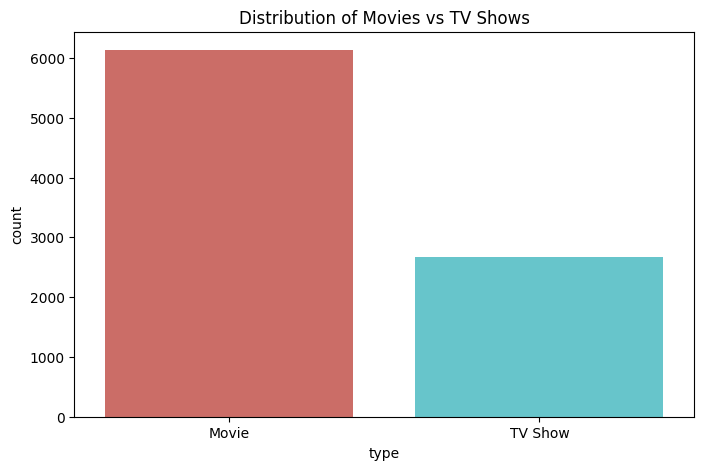

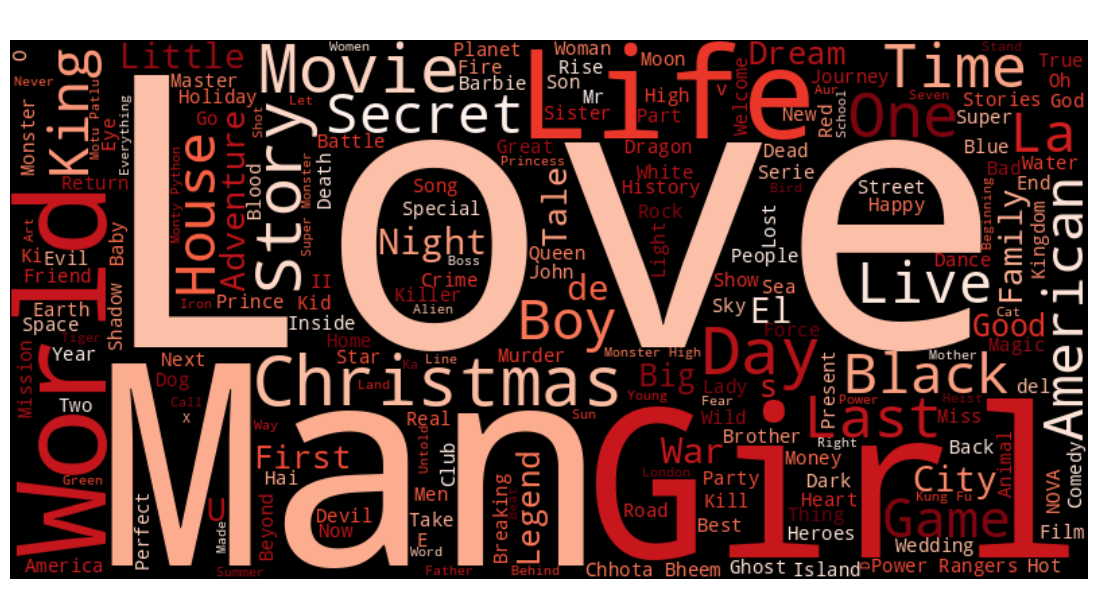

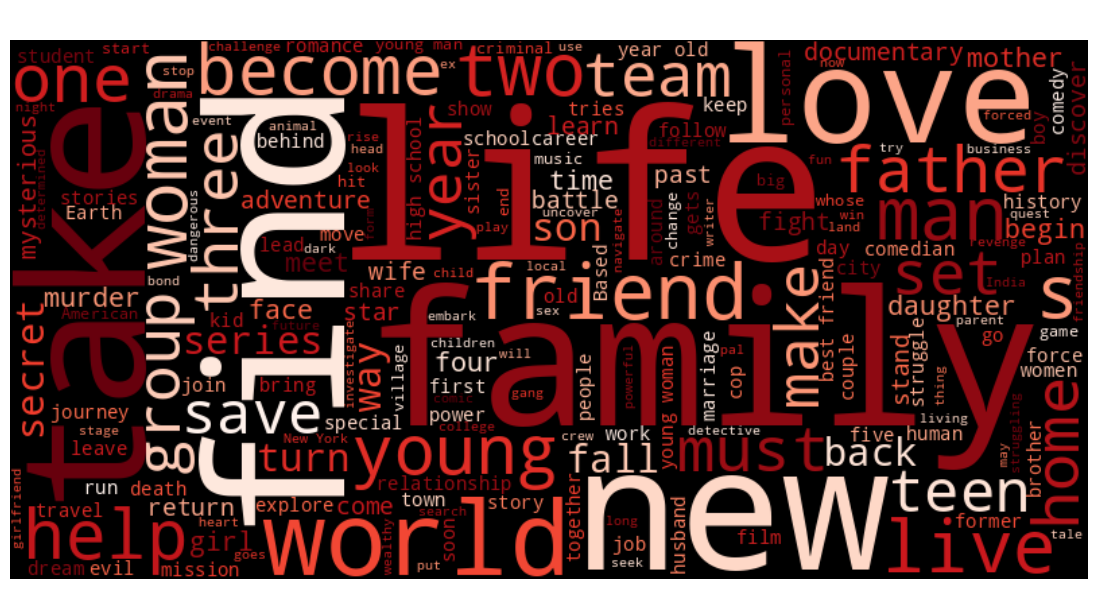

Top-5 recommendations for 'Kota Factory':

                     title                                          listed_in  \
0       Cheese in the Trap  International TV Shows, Korean TV Shows, Roman...   
1           Criminal Minds            Crime TV Shows, TV Dramas, TV Mysteries   
2     Single Ladies Senior  International TV Shows, Romantic TV Shows, TV ...   
3  The Great Train Robbery  British TV Shows, Crime TV Shows, Internationa...   
4           The Politician              TV Comedies, TV Dramas, Teen TV Shows   

                                         description  
0  In this adaptation of a popular webtoon, a poo...  
1  This intense police procedural follows a group...  
2  Four best friends and spirited career women na...  
3  This two-part tale delivers the true story of ...  
4  Rich kid Payton has always known he's going to...  


In [2]:
# Netflix Recommendation System | Python, Scikit-Learn, NLP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# -----------------------
# Load and Preprocess Data
# -----------------------
df = pd.read_csv('/content/netflix_data.csv')

# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# -----------------------
# Exploratory Visualizations
# -----------------------
# Content Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, palette='hls')
plt.title('Distribution of Movies vs TV Shows')
plt.show()

# Ratings Distribution
rating_counts = df['rating'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=rating_counts.index, y=rating_counts.values, marker_color='#E50914'
)])
fig.update_layout(title='Content Ratings Distribution', xaxis_title='Rating', yaxis_title='Count')
fig.show()

# WordCloud of Titles
titles_text = ' '.join(df['title'])
wordcloud = WordCloud(background_color='black', colormap='Reds', width=800, height=400).generate(titles_text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', fontsize=20, color='white')
plt.show()

# WordCloud of Descriptions
desc_text = ' '.join(df['description'])
wordcloud = WordCloud(background_color='black', colormap='Reds', width=800, height=400).generate(desc_text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', fontsize=20, color='white')
plt.show()

# -----------------------
# Feature Engineering
# -----------------------
# Combine title + genres + description
df['combined_features'] = df['title'] + " " + df['listed_in'] + " " + df['description']

# -----------------------
# TF-IDF Vectorization & Cosine Similarity
# -----------------------
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Vectorized similarity matrix (fast for large datasets)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# -----------------------
# Recommendation Function
# -----------------------
def recommend_movies(title, df, cosine_sim, top_n=5):
    """
    Returns Top-N recommended movies/shows for a given title
    based on content similarity (title, genres, description).
    """
    idx = df[df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return f"Title '{title}' not found in dataset."

    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    movie_indices = [i[0] for i in sim_scores]
    recommendations = df.iloc[movie_indices][['title', 'listed_in', 'description']]
    return recommendations.reset_index(drop=True)

# -----------------------
# Example Usage
# -----------------------
movie_title = "Kota Factory"
print(f"Top-5 recommendations for '{movie_title}':\n")
recommendations = recommend_movies(movie_title, df, cosine_sim, top_n=5)
print(recommendations)
